In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")
%matplotlib inline

from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv("../datasets/Iris.csv")

In [91]:
df.shape

(150, 6)

In [92]:
missing = df.isnull().values.any()

In [93]:
if missing == True:
    df = df.ffill().bfill()
    print("null values filled")
else:
     print("no null values encountered")

null values filled


In [94]:
label = preprocessing.LabelEncoder() 

In [95]:
object_col = df.select_dtypes(include=['object']).columns

In [96]:
for name in object_col:
    df[name] = label.fit_transform(df[name]) 

In [97]:
df.drop_duplicates(inplace=True)

In [109]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

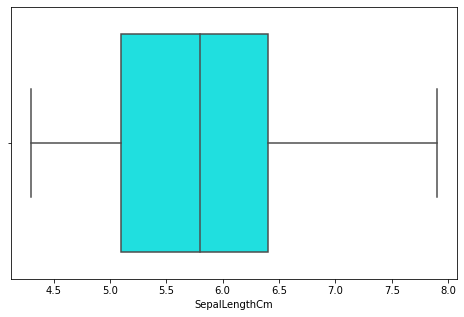

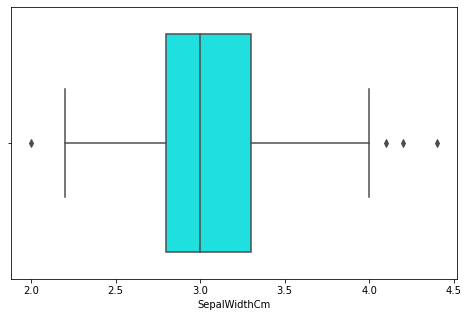

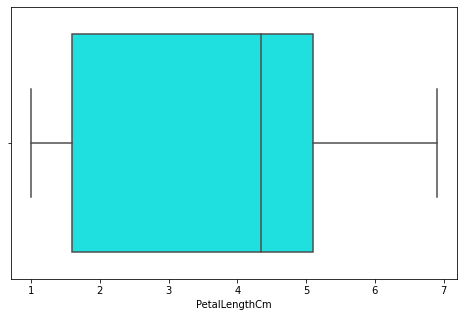

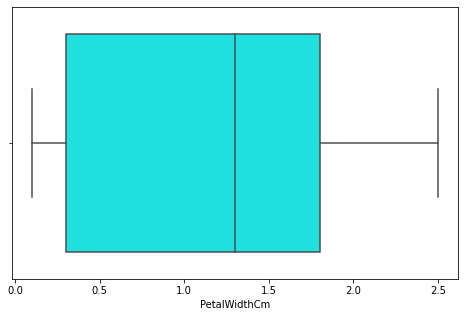

In [98]:
for col in df.columns:
    if df[col].dtype=='float64':
        plt.figure(figsize=(8,5))
        sns.boxplot(df[col],color="cyan")
        plt.show()

In [99]:
for col in df.columns:
    q1,q3 = np.percentile(df[col],[25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    upper_fence = q3 + (1.5*iqr)
    df[col] = df[col].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)

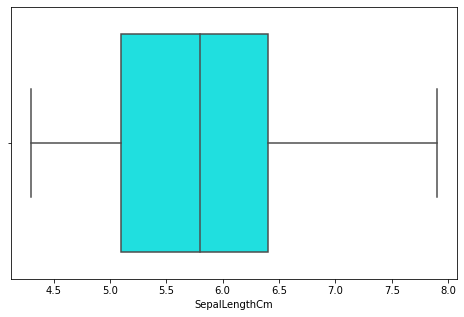

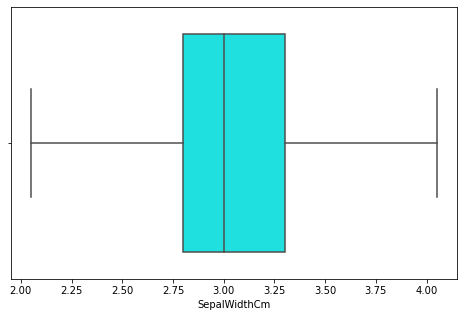

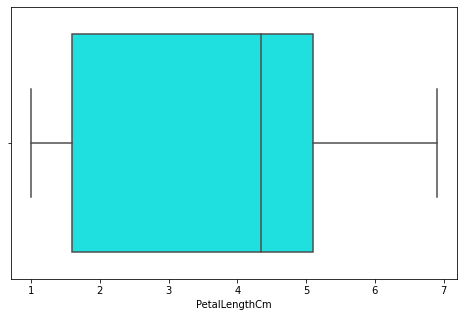

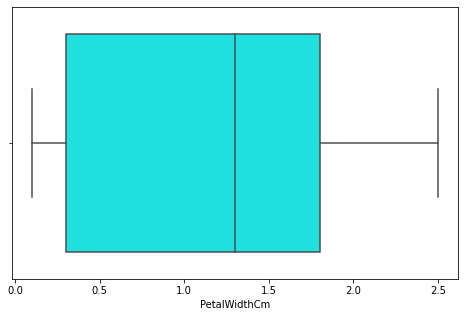

In [100]:
for col in df.columns:
    if df[col].dtype=='float64':
        plt.figure(figsize=(8,5))
        sns.boxplot(df[col],color="cyan")
        plt.show()

In [110]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.385118,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.103613,0.871754,0.817954,0.782561
SepalWidthCm,-0.385118,-0.103613,1.000000,-0.410770,-0.346511,-0.411134
PetalLengthCm,0.882747,0.871754,-0.410770,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.346511,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.411134,0.949043,0.956464,1.000000


<AxesSubplot:>

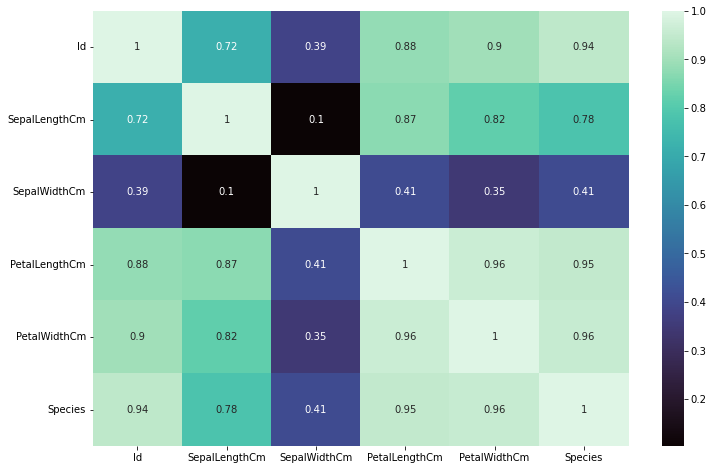

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap ='mako',annot= True)

In [112]:
# X = df.iloc[:,:-1]
# Y = df[df.columns[-1]]

In [116]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [117]:
col_len = len(df.columns)

In [118]:
SSE =[]
for i in range(1,10):
    kmeans =KMeans(n_jobs = -1, n_clusters = i, init = 'k-means++')
    kmeans.fit(df.iloc[:,0:col_len])
    SSE.append(kmeans.inertia_)

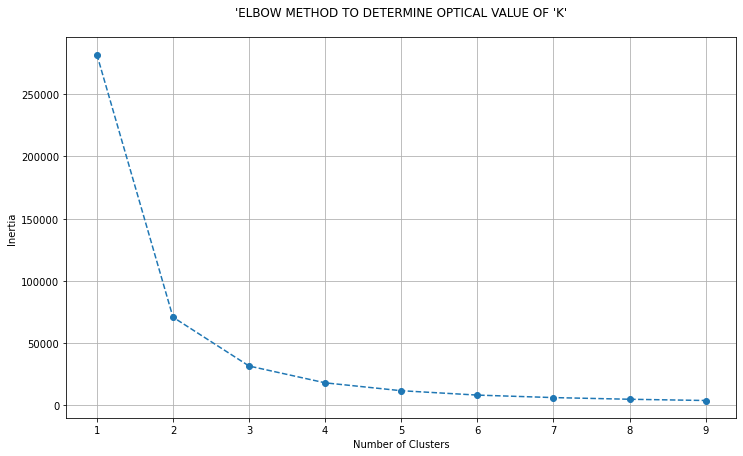

In [119]:
df = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,7))
plt.plot(df['Cluster'],df['SSE'],'--',marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("'ELBOW METHOD TO DETERMINE OPTICAL VALUE OF 'K'\n")
plt.grid()

In [122]:
kmeans = KMeans(n_jobs = -1 , n_clusters=3,init = 'k-means++')
kmeans.fit(df.iloc[:,0:col_len])
kmeans.cluster_centers_

array([[6.00000000e+00, 1.17984706e+04],
       [1.00000000e+00, 2.82016776e+05],
       [2.00000000e+00, 7.06483769e+04]])

In [123]:
kmeans.labels_

array([1, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [124]:
df['cluster'] = kmeans.labels_

In [125]:
df

,Cluster,SSE,cluster
0,1,282016.775733,1
1,2,70648.376933,2
2,3,31326.115500,0
3,4,17796.412198,0
4,5,11454.759251,0
5,6,7929.247300,0
6,7,5924.565381,0
7,8,4582.982589,0
8,9,3575.212229,0
